In [42]:
import numpy as np
import pandas as pd
import statistics
from   scipy import stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#read dataset

emp_data=pd.read_csv("C:\\Users\\yogen\\Downloads\\employee_experience_survey_data.csv")


In [3]:
emp_data.shape

(15, 18)

In [4]:
emp_data.head()

,Name,Age Bracket,Gender,Ethnicity,Job Title,Department,Date Survey Completed,Job Satisfaction,Work-Life Balance,Management Support,Team Collaboration,Workload Fairness,Career Development Opportunities,Workplace Inclusivity,Company Communication,Compensation Satisfaction,Job Security,Overall Engagement
0,John Doe,25-34,Female,Asian,Product Manager,Product Development,2024-10-05,Disagree,Strongly Agree,Neutral,Neutral,Neutral,Disagree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree
1,Jane Smith,18-24,Female,Middle Eastern,Operations Manager,Sales,2024-10-07,Agree,Strongly Disagree,Strongly Agree,Neutral,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Neutral
2,Carlos Reyes,45-54,Female,Indian,UX Designer,Consulting,2024-10-08,Neutral,Strongly Disagree,Agree,Disagree,Strongly Agree,Agree,Agree,Strongly Disagree,Neutral,Strongly Agree,Strongly Agree
3,Emily Zhang,35-44,Male,Caucasian,UX Designer,HR,2024-10-07,Neutral,Agree,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Agree,Strongly Disagree,Strongly Disagree,Agree,Neutral
4,Michael Johnson,18-24,Female,Caucasian,UX Designer,Product Development,2024-10-07,Agree,Strongly Agree,Disagree,Neutral,Strongly Disagree,Disagree,Disagree,Disagree,Strongly Disagree,Neutral,Disagree


In [5]:
emp_data.isnull().sum()

Name                                0
Age Bracket                         0
Gender                              0
Ethnicity                           0
Job Title                           0
Department                          0
Date Survey Completed               0
Job Satisfaction                    0
Work-Life Balance                   0
Management Support                  0
Team Collaboration                  0
Workload Fairness                   0
Career Development Opportunities    0
Workplace Inclusivity               0
Company Communication               0
Compensation Satisfaction           0
Job Security                        0
Overall Engagement                  0
dtype: int64

In [6]:
emp_data.dtypes


Name                                object
Age Bracket                         object
Gender                              object
Ethnicity                           object
Job Title                           object
Department                          object
Date Survey Completed               object
Job Satisfaction                    object
Work-Life Balance                   object
Management Support                  object
Team Collaboration                  object
Workload Fairness                   object
Career Development Opportunities    object
Workplace Inclusivity               object
Company Communication               object
Compensation Satisfaction           object
Job Security                        object
Overall Engagement                  object
dtype: object

In [10]:
#Data Cleaning
emp_data.drop_duplicates(inplace=True)


In [15]:
emp_data.describe()
print(statistics.multimode(emp_data['Overall Engagement']))
print(statistics.multimode(emp_data['Job Satisfaction']))

['Strongly Agree', 'Neutral']
['Disagree', 'Agree']


In [ ]:
# no. of employee  who  'Strongly Agree' and no. of employee who "Neutral" are equaly most occuring to "Overalll engaggement".
# no. of employee  who  'Disagree' and no. of employee who "Agree" are equaly most occuring to "Job Satisfaction".

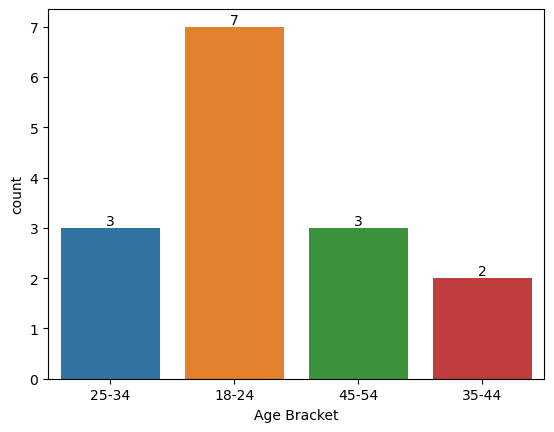

In [17]:
#2.
age_group=sns.countplot(x="Age Bracket",data=emp_data)
for bar in age_group.containers:
    age_group.bar_label(bar)
    

In [19]:
# In this chart we can see most of the workers  are  in  18-24 age  range and least workers are in 35-44 age range.

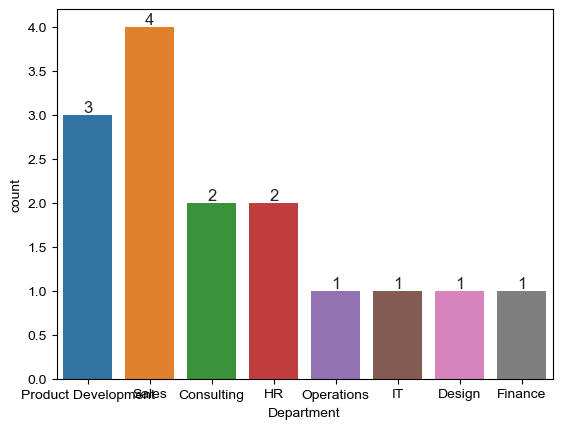

In [21]:
department=sns.countplot(x='Department',data=emp_data)
sns.set(rc={'figure.figsize':(15,8)})

for bar in department.containers:
    department.bar_label(bar)
                    

In [23]:
# In this chart most of workers are in Sales department.

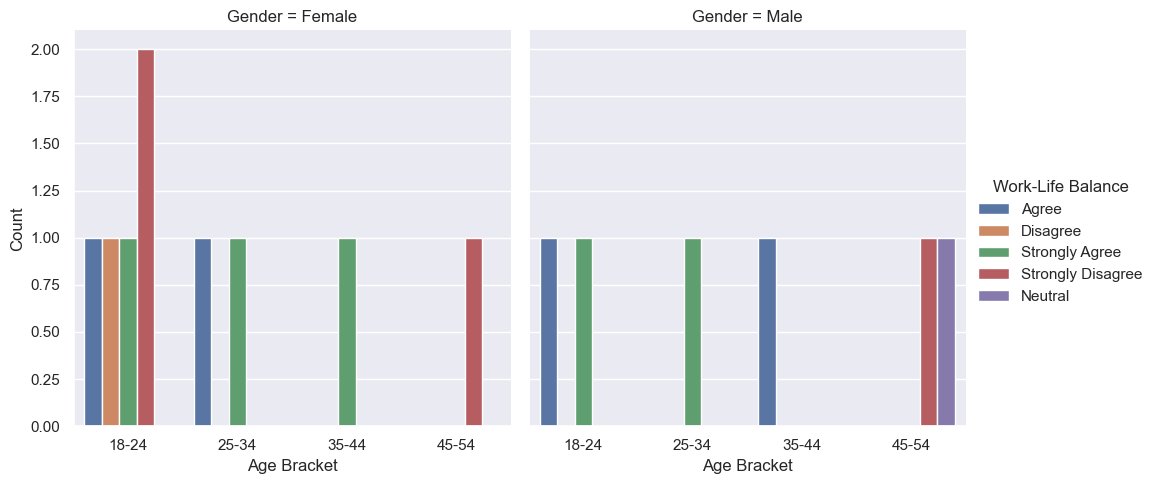

In [25]:
age=emp_data.groupby(['Age Bracket','Gender','Work-Life Balance']).size().reset_index(name='Count')

sns.catplot(x='Age Bracket',y='Count',hue='Work-Life Balance',col='Gender',kind='bar',data=age,height=5,aspect=1)
plt.show()

In [26]:
# In this chart we can see that most of  Female strongly disagree in 18-24 age group while male not disagree  same age group. 
# Age group 45-54 Work-Life balance strongly disagree  both  gender are strongly disagree.  

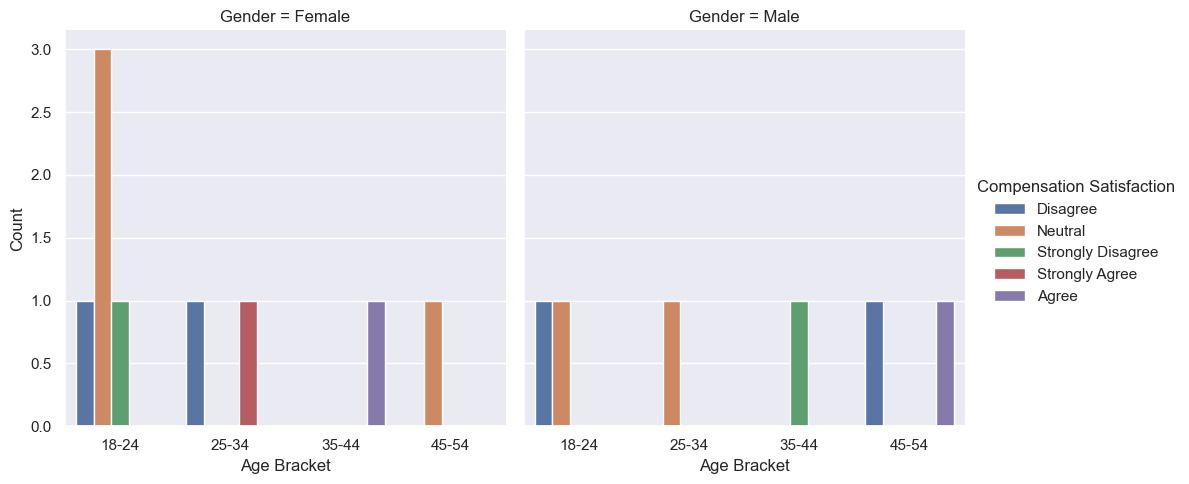

In [29]:
age=emp_data.groupby(['Age Bracket','Gender','Compensation Satisfaction']).size().reset_index(name='Count')
sns.catplot(x='Age Bracket',y='Count',hue='Compensation Satisfaction',col='Gender',kind='bar',data=age,height=5,aspect=1)
plt.show()

In [31]:
# IN this chart we can see as campaire to male in age group 18-24  female are more neutral and strongly disagree.

In [46]:
satisfaction_mapping={'Strongly Agree': 5,
    'Agree': 4,
    'Neutral': 3,
    'Disagree': 2,
    'Strongly Disagree': 1}

emp_data['Satisfaction Score']=emp_data['Job Satisfaction'].map(satisfaction_mapping)

IT_score=emp_data[emp_data['Department']== 'Sales']['Satisfaction Score']
HR_score=emp_data[emp_data['Department']== 'HR']['Satisfaction Score']

t_statistic,p_value = stats.ttest_ind(HR_score,IT_score)

print(f"t-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference in job satisfaction between Sales and HR.")
else:
    print("We fail to reject the null hypothesis. No significant difference in job satisfaction between Sales and HR.")


t-statistic: 0.9759000729485332
P-value: 0.3843727364479507
We fail to reject the null hypothesis. No significant difference in job satisfaction between Sales and HR.


In [48]:
# A low t-statistic typically corresponds to a high p-value. This reinforces the conclusion that there is no statistically significant difference in Job Satisfaction between the two departments.

In [38]:
contingency_table=pd.crosstab(emp_data['Work-Life Balance'], emp_data['Overall Engagement'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()  
k = min(contingency_table.shape)  
cramers_v = np.sqrt(chi2 / (n * (k - 1)))

print(f"Cramér's V: {cramers_v:.2f}")




Cramér's V: 0.49


In [ ]:
# Strongly association. This shows that focusing on work-life balance is a good strategy for improving how involved and motivated employees feel at work.